In [1]:
#import dependencies
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#load files from resource into dataframe
data = Path('Resource/Diabetes_Prediction_2018_2022.csv')
df = pd.read_csv(data)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,1,0,40,1,0,0,0,0,...,0,1,0,5,18,15,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,3,0,0,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,...,0,1,1,5,30,30,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,...,0,1,0,2,0,0,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,2,3,0,0,0,11,5


In [3]:
#categorize type 1 and type2 diabete into patient with diabete
df["Diabetes_012"] = df["Diabetes_012"].replace(2,1)
df["Diabetes_012"].head()
df1 = df[(df["Diabetes_012"]==0)]
df2 = df[(df["Diabetes_012"]==1)]
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,1,0,40,1,0,0,0,0,...,0,1,0,5,18,15,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,3,0,0,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,...,0,1,1,5,30,30,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,...,0,1,0,2,0,0,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,2,3,0,0,0,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249988,0,1,1,1,30,1,0,0,1,1,...,0,1,0,2,10,5,0,0,10,6
249990,0,1,1,1,25,1,0,0,1,1,...,0,1,0,3,0,0,0,1,8,6
249992,0,0,0,1,20,0,0,0,1,1,...,0,0,1,4,0,4,1,0,1,4
249993,0,0,1,1,25,0,0,0,1,1,...,0,1,0,3,0,0,0,0,9,4


In [4]:
#make even balance amount of data for patients without diabete to patients with diabete
no_to_drop = len(df1["Diabetes_012"])-len(df2["Diabetes_012"])
df1 = df1.drop(df1.index[:no_to_drop])
df1.reset_index(inplace=True,drop=True)
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,0,0,22,1,0,0,0,1,...,0,1,0,1,30,0,0,0,6,6
1,0,0,0,1,23,0,0,0,1,1,...,0,1,0,1,0,0,0,0,9,6
2,0,0,1,1,25,0,0,1,1,0,...,0,1,0,3,0,0,0,0,12,6
3,0,0,0,1,28,0,0,0,1,0,...,0,1,0,3,0,30,0,0,10,5
4,0,0,1,1,32,1,0,0,1,1,...,0,1,0,1,2,0,1,0,9,5


In [5]:
#concat both dataframe for patient with diabete and without diabete
df = pd.concat([df1,df2], axis=0, ignore_index= True)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,0,0,22,1,0,0,0,1,...,0,1,0,1,30,0,0,0,6,6
1,0,0,0,1,23,0,0,0,1,1,...,0,1,0,1,0,0,0,0,9,6
2,0,0,1,1,25,0,0,1,1,0,...,0,1,0,3,0,0,0,0,12,6
3,0,0,0,1,28,0,0,0,1,0,...,0,1,0,3,0,30,0,0,10,5
4,0,0,1,1,32,1,0,0,1,1,...,0,1,0,1,2,0,1,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78133,1,1,1,1,28,0,0,0,1,1,...,0,1,1,3,0,30,0,0,7,3
78134,1,1,1,1,24,1,0,0,1,0,...,0,1,0,3,0,0,0,1,9,4
78135,1,1,1,1,28,1,0,0,1,1,...,0,1,1,5,14,14,1,0,8,4
78136,1,1,0,1,22,0,0,0,1,1,...,0,1,0,3,0,0,0,0,8,3


In [6]:
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
Diabetes_012,1.000000,0.381865,0.292018,0.120648,0.304278,0.111531,0.118689,0.207017,-0.174280,-0.057566,...,-0.090530,0.030831,0.041977,0.397637,0.095812,0.208339,0.269326,0.033921,0.293513,-0.171386
HighBP,0.381865,1.000000,0.320070,0.109723,0.248393,0.100667,0.130189,0.209036,-0.141072,-0.044711,...,-0.023235,0.044551,0.022434,0.321216,0.067068,0.175735,0.238222,0.047376,0.343053,-0.143971
HighChol,0.292018,0.320070,1.000000,0.098031,0.130210,0.108128,0.101796,0.183925,-0.095493,-0.046290,...,-0.026781,0.034926,0.027299,0.239881,0.084472,0.142249,0.161487,0.020892,0.250589,-0.080840
CholCheck,0.120648,0.109723,0.098031,1.000000,0.054234,0.005732,0.026995,0.046778,-0.012397,0.016778,...,-0.028643,0.098348,-0.045649,0.065765,-0.001798,0.039268,0.052368,-0.011439,0.103145,-0.013309
BMI,0.304278,0.248393,0.130210,0.054234,1.000000,0.021349,0.023821,0.059529,-0.180787,-0.091627,...,-0.057706,-0.014375,0.067446,0.278988,0.115083,0.159698,0.246795,-0.000954,-0.027849,-0.111707
Smoke,0.111531,0.100667,0.108128,0.005732,0.021349,1.000000,0.066023,0.133836,-0.091501,-0.080443,...,0.087777,-0.010272,0.032900,0.173181,0.094296,0.126322,0.135696,0.115236,0.113952,-0.152622
Stroke,0.118689,0.130189,0.101796,0.026995,0.023821,0.066023,1.000000,0.222122,-0.077946,-0.009861,...,-0.025684,0.008363,0.037794,0.189756,0.081497,0.159338,0.193933,0.000755,0.124620,-0.074775
HeartDiseaseorAttack,0.207017,0.209036,0.183925,0.046778,0.059529,0.133836,0.222122,1.000000,-0.100035,-0.020023,...,-0.039898,0.022807,0.029427,0.278559,0.079449,0.200652,0.234233,0.095109,0.226267,-0.097796
PhysicalActivity,-0.174280,-0.141072,-0.095493,-0.012397,-0.180787,-0.091501,-0.077946,-0.100035,1.000000,0.134894,...,0.016838,0.032846,-0.062923,-0.280341,-0.136837,-0.241177,-0.275907,0.044230,-0.103890,0.190600
Fruits,-0.057566,-0.044711,-0.046290,0.016778,-0.091627,-0.080443,-0.009861,-0.020023,0.134894,1.000000,...,-0.029890,0.029656,-0.045996,-0.100445,-0.066056,-0.049926,-0.053550,-0.088422,0.057932,0.100580


In [7]:
#scale the dataframe beside diabete column
df_prep = df.drop(columns=["Diabetes_012"])
diabete_scaled = StandardScaler().fit_transform(df_prep)

In [8]:
#turn scaled dataset into dataframe
df_scaled = pd.DataFrame(diabete_scaled)
df_scaled.columns = df_prep.columns
df_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,-1.10121,-1.040146,-5.953567,-1.113087,1.075122,-0.25441,-0.405694,-1.600247,0.786917,0.505042,-0.216839,0.226967,-0.324931,-1.626239,3.266423,-0.571428,-0.567192,-0.922947,-0.865075,1.042712
1,-1.10121,-1.040146,0.167967,-0.969109,-0.930127,-0.25441,-0.405694,0.624903,0.786917,0.505042,-0.216839,0.226967,-0.324931,-1.626239,-0.457508,-0.571428,-0.567192,-0.922947,0.171794,1.042712
2,-1.10121,0.961404,0.167967,-0.681152,-0.930127,-0.25441,2.464913,0.624903,-1.270781,-1.980033,-0.216839,0.226967,-0.324931,0.176418,-0.457508,-0.571428,-0.567192,-0.922947,1.208663,1.042712
3,-1.10121,-1.040146,0.167967,-0.249217,-0.930127,-0.25441,-0.405694,0.624903,-1.270781,0.505042,-0.216839,0.226967,-0.324931,0.176418,-0.457508,2.446942,-0.567192,-0.922947,0.517417,0.062780
4,-1.10121,0.961404,0.167967,0.326696,1.075122,-0.25441,-0.405694,0.624903,0.786917,0.505042,-0.216839,0.226967,-0.324931,-1.626239,-0.209246,-0.571428,1.763071,-0.922947,0.171794,0.062780


In [9]:
#prepare X and y dataset for the model
y = df["Diabetes_012"]
X = df_scaled
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(58603, 20)

In [10]:
# create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

#fit the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [11]:
# create prediction
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(100)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
95,1,0
96,1,1
97,0,0
98,0,0


In [12]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7516764781162016

In [13]:
# Display the confusion matrix for the test dataset.
confusion_matrix(y_test, predictions)

array([[7182, 2585],
       [2266, 7502]], dtype=int64)

In [14]:
# Display the classification for the test dataset.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      9767
           1       0.74      0.77      0.76      9768

    accuracy                           0.75     19535
   macro avg       0.75      0.75      0.75     19535
weighted avg       0.75      0.75      0.75     19535



# Change X to respective dataset to test the model

In [15]:
Health_wellness = df_scaled[["HighBP","HighChol","CholCheck","BMI","DiffWalk"]]
Behavioral = df_scaled[["Smoke","Fruits","Veggies","AlcoholConsump","PhysicalActivity"]]
Medical = df_scaled[["HeartDiseaseorAttack","Stroke","AnyHealthcare","GenHlth","MentHlth","PhysHlth"]]
Bio = df_scaled[["Sex","Age","Education","NoDocbcCost"]]

In [16]:
#prepare X and y dataset for the model
y = df["Diabetes_012"]
X = df_scaled[["HighBP","HighChol","CholCheck","BMI",
              "Smoke","PhysicalActivity",
              "HeartDiseaseorAttack","Stroke","AnyHealthcare","GenHlth",
              "Age","Education","NoDocbcCost"]]
#X = pd.concat([Health_wellness, Medical,Bio,Behavioral], axis=1) #for concat columns

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

# create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

#fit the model
classifier.fit(X_train, y_train)

# create prediction
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(100)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
95,1,0
96,1,1
97,0,0
98,0,0


In [17]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7483491169695419

In [18]:
# Display the confusion matrix for the test dataset.
confusion_matrix(y_test, predictions)

array([[7165, 2602],
       [2314, 7454]], dtype=int64)

In [19]:
# Display the classification for the test dataset.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      9767
           1       0.74      0.76      0.75      9768

    accuracy                           0.75     19535
   macro avg       0.75      0.75      0.75     19535
weighted avg       0.75      0.75      0.75     19535



# Decision Tree Model

In [20]:
from sklearn import tree

In [21]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,0,0,22,1,0,0,0,1,...,0,1,0,1,30,0,0,0,6,6
1,0,0,0,1,23,0,0,0,1,1,...,0,1,0,1,0,0,0,0,9,6
2,0,0,1,1,25,0,0,1,1,0,...,0,1,0,3,0,0,0,0,12,6
3,0,0,0,1,28,0,0,0,1,0,...,0,1,0,3,0,30,0,0,10,5
4,0,0,1,1,32,1,0,0,1,1,...,0,1,0,1,2,0,1,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78133,1,1,1,1,28,0,0,0,1,1,...,0,1,1,3,0,30,0,0,7,3
78134,1,1,1,1,24,1,0,0,1,0,...,0,1,0,3,0,0,0,1,9,4
78135,1,1,1,1,28,1,0,0,1,1,...,0,1,1,5,14,14,1,0,8,4
78136,1,1,0,1,22,0,0,0,1,1,...,0,1,0,3,0,0,0,0,8,3


In [41]:
X_dt = df.copy()
X_dt.drop('Diabetes_012', axis=1, inplace=True)
y_dt = df['Diabetes_012'].values.reshape(-1,1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, random_state=78)

In [43]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [44]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [46]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6630,3217
Actual 1,3523,6165


Accuracy Score : 0.654978244177118
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      9847
           1       0.66      0.64      0.65      9688

    accuracy                           0.65     19535
   macro avg       0.66      0.65      0.65     19535
weighted avg       0.66      0.65      0.65     19535



# Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X_rf = df.copy()
X_rf.drop('Diabetes_012', axis=1, inplace=True)
y_rf = df['Diabetes_012'].ravel()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, random_state=78)

In [62]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [63]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [64]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6864,2983
Actual 1,2239,7449


Accuracy Score : 0.7326849244944971
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      9847
           1       0.71      0.77      0.74      9688

    accuracy                           0.73     19535
   macro avg       0.73      0.73      0.73     19535
weighted avg       0.73      0.73      0.73     19535



In [65]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19299288102606238, 'BMI'),
 (0.08038647988759713, 'HighBP'),
 (0.04015410150718056, 'HighChol'),
 (0.030824823490895565, 'AnyHealthcare'),
 (0.029251532399351587, 'Smoke'),
 (0.023081033241432146, 'Stroke'),
 (0.022732755659699896, 'GenHlth'),
 (0.01902549157162627, 'HeartDiseaseorAttack'),
 (0.013839530799447797, 'NoDocbcCost'),
 (0.011137511772404955, 'PhysicalActivity'),
 (0.01008061778459033, 'Age'),
 (0.008959620515348337, 'Education'),
 (0.006807406530148415, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

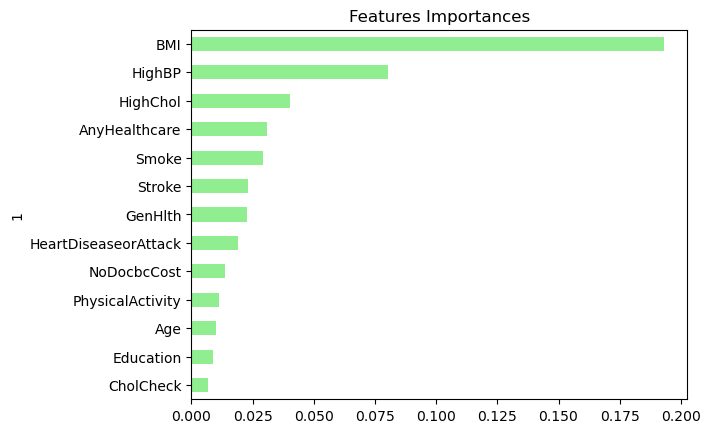

In [66]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
confusion_matrix(y_pred,y_test)

array([[6774, 2832],
       [3073, 6856]], dtype=int64)

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      9606
           1       0.71      0.69      0.70      9929

    accuracy                           0.70     19535
   macro avg       0.70      0.70      0.70     19535
weighted avg       0.70      0.70      0.70     19535

